# 项目：爬取豆瓣电影标题数据

## 爬取目标

此爬取的目的是，通过`Python`的`Request`库，拿到豆瓣电影TOP 250页面的源代码，然后对源代码进行进一步的解析提取，获取其中的标题信息。

## 爬取准备

导入爬取网页所需要的库。

In [2]:
import requests
from bs4 import BeautifulSoup

导入爬取网页所需要的库，并将用户头`User-Agent`**转换成浏览器的用户头**，从而**使请求伪装成正常用户**

## 获取浏览器的用户头

首先**随便打开一个网页**，**点击鼠标右键打开审查元素**

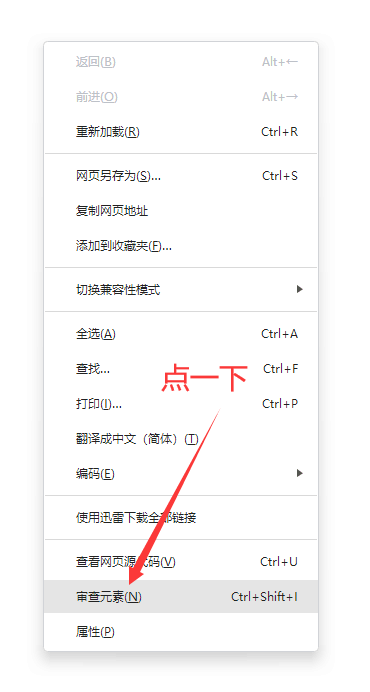

然后找到**网络**再然后**在页面上点击鼠标右键打开重新加载**

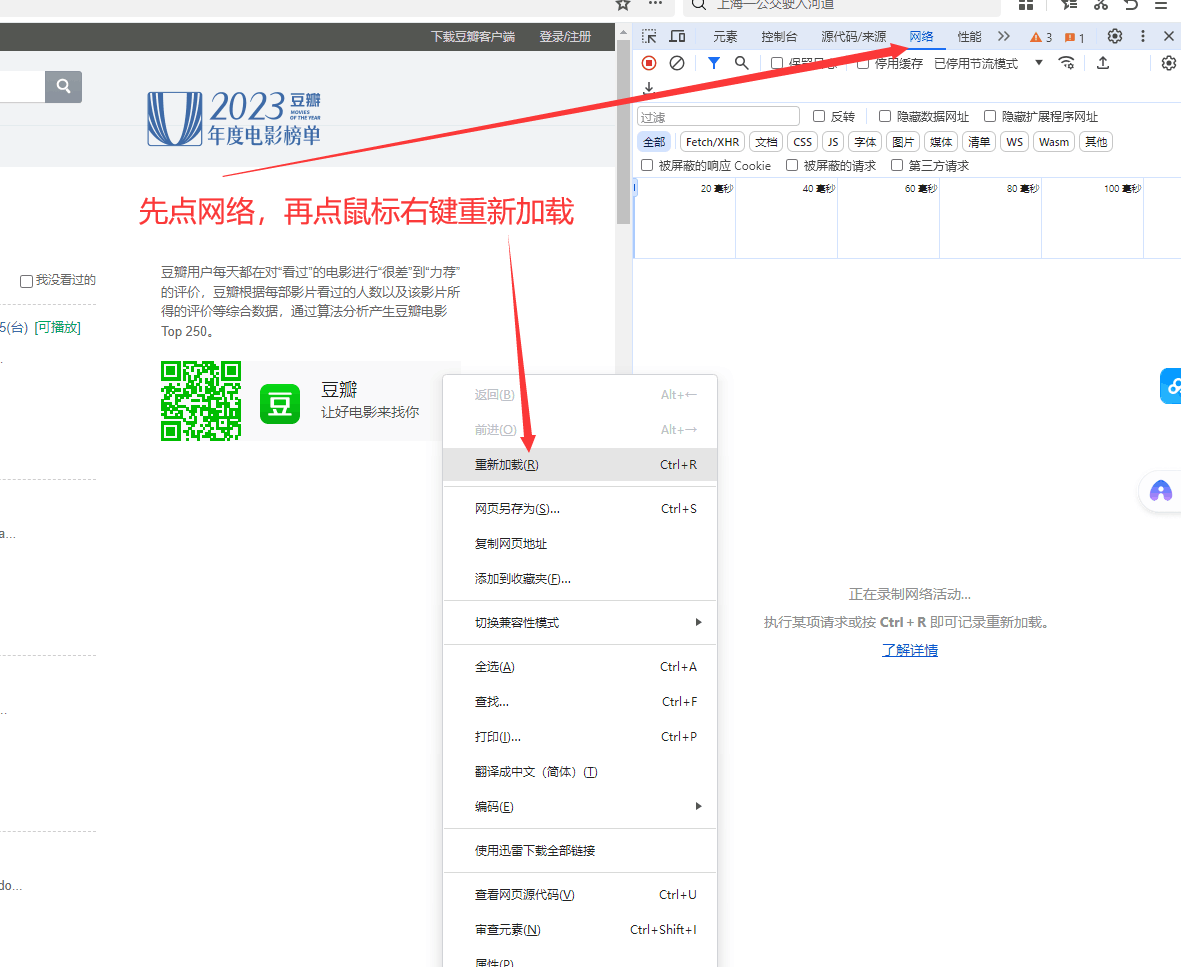

其次**随便点击一个名称**，鼠标**往下翻找到User-Agent**，进行**复制**，然后**将复制的内容粘贴到用户头代码中即可**

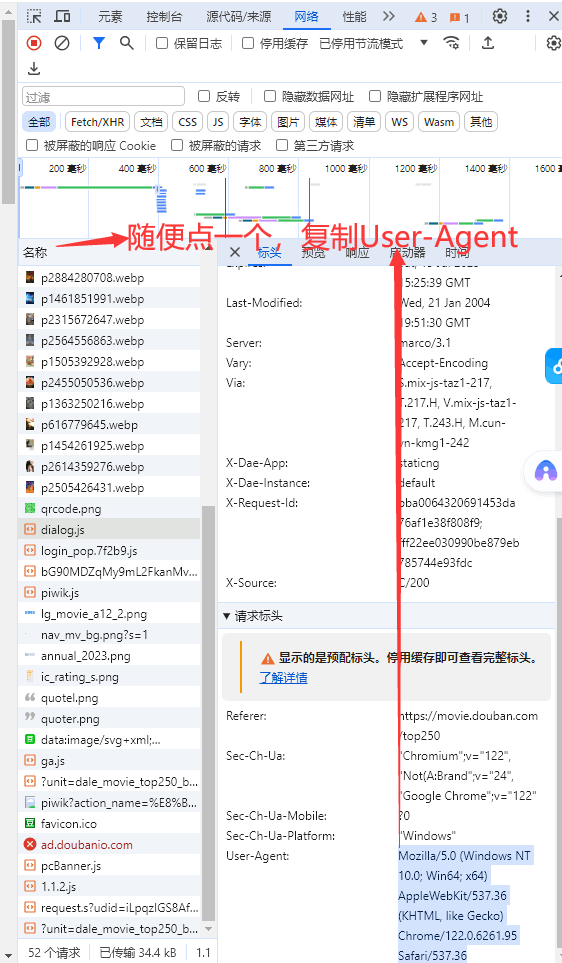

## 操作过程

将`User-Agent`用户头更改成浏览器的用户头并赋值给变量`headers`

In [3]:
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.95 Safari/537.36"
}

使用`Request`库的`GET`请求方法获取豆瓣TOP250电影页面的信息并赋值给变量`response`

In [4]:
response = requests.get("https://movie.douban.com/top250", headers=headers)

打印出状态码和源代码内容

In [6]:
print(response.status_code)

200


200表示请求成功

In [7]:
print(response.text)

<!DOCTYPE html>
<html lang="zh-CN" class="ua-windows ua-webkit">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
豆瓣电影 Top 250
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2006 01:00:00 GMT">
    
    <link rel="apple-touch-icon" href="https://img1.doubanio.com/cuphead/movie-static/pics/apple-touch-icon.png">
    <link href="https://img1.doubanio.com/f/vendors/e92483e5e4c9c60cc75cbd8b700a2fd5b5fdf7b0/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img1.doubanio.com/f/vendors/ee6598d46af0bc554cecec9bcbf525b9b0582cb0/css/separation/_all.css" rel="stylesheet" type="text/css">
    <link href="https://

成功获取到源代码，再将源代码数据储存到新变量`html`中，再用`BeautifulSoup`构造函数对html的内容赋值给新对象`soup`,从而搜寻我们想要的信息


In [8]:
html = response.text
soup = BeautifulSoup(html, "html.parser")

在对`soup`对象做任何解析操作之前，先分析一下想提取的信息的特点

先进入豆瓣电影TOP250页面网址，在点击鼠标右键打开审查元素

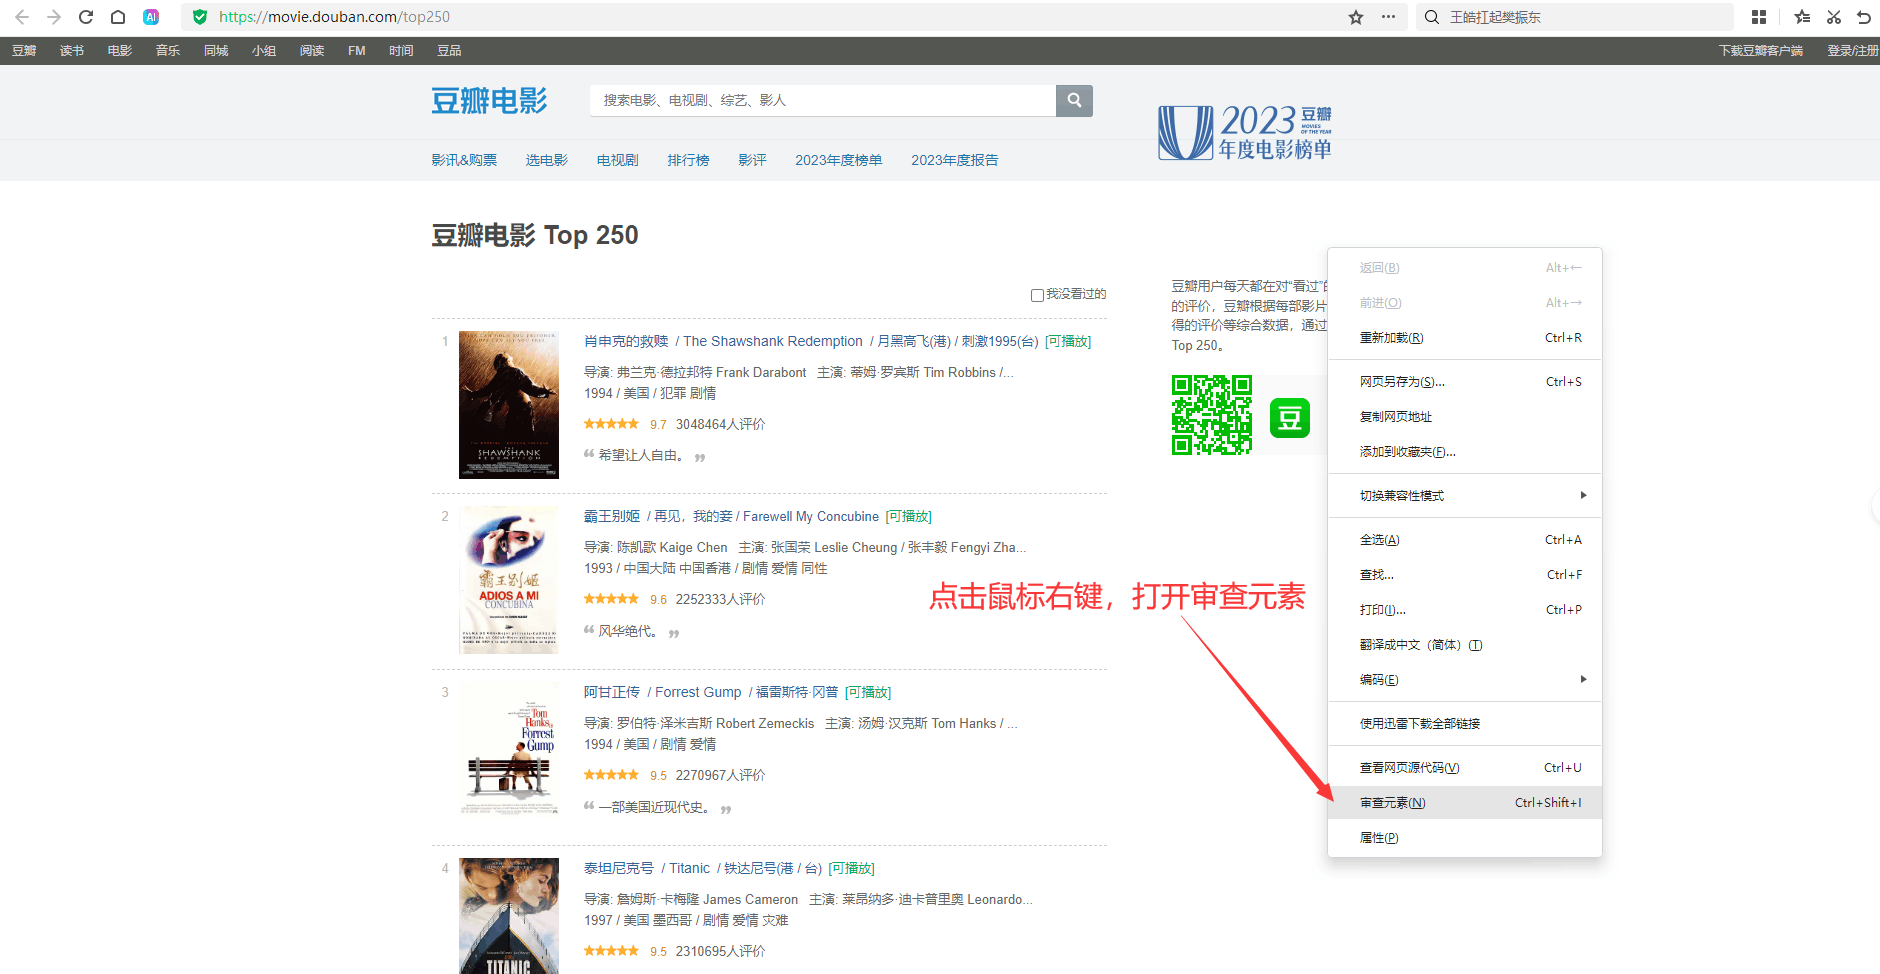

再点击右上角箭头图标

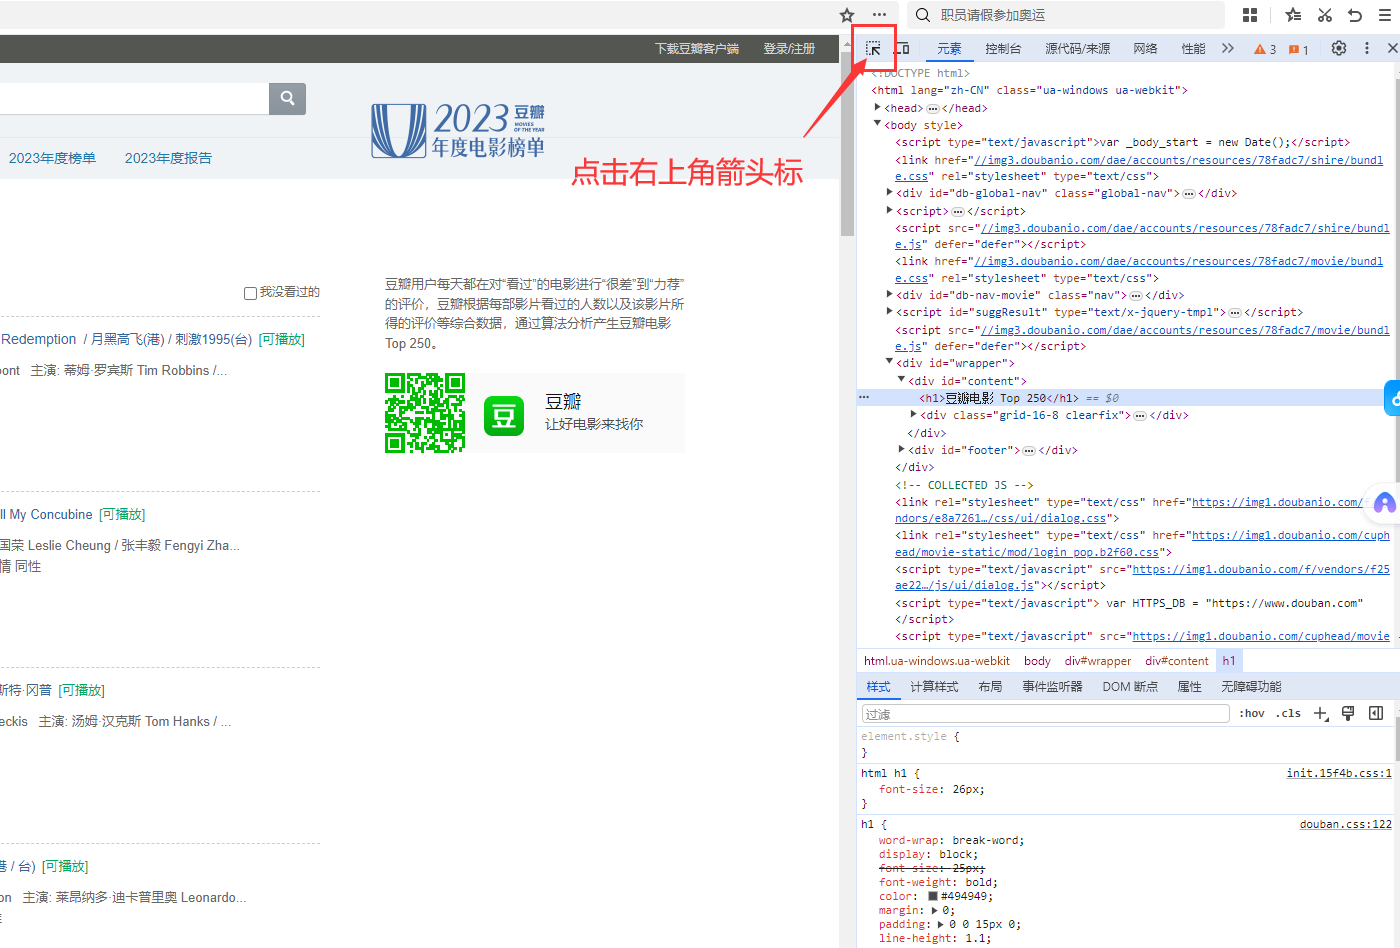

点击要查看的元素信息

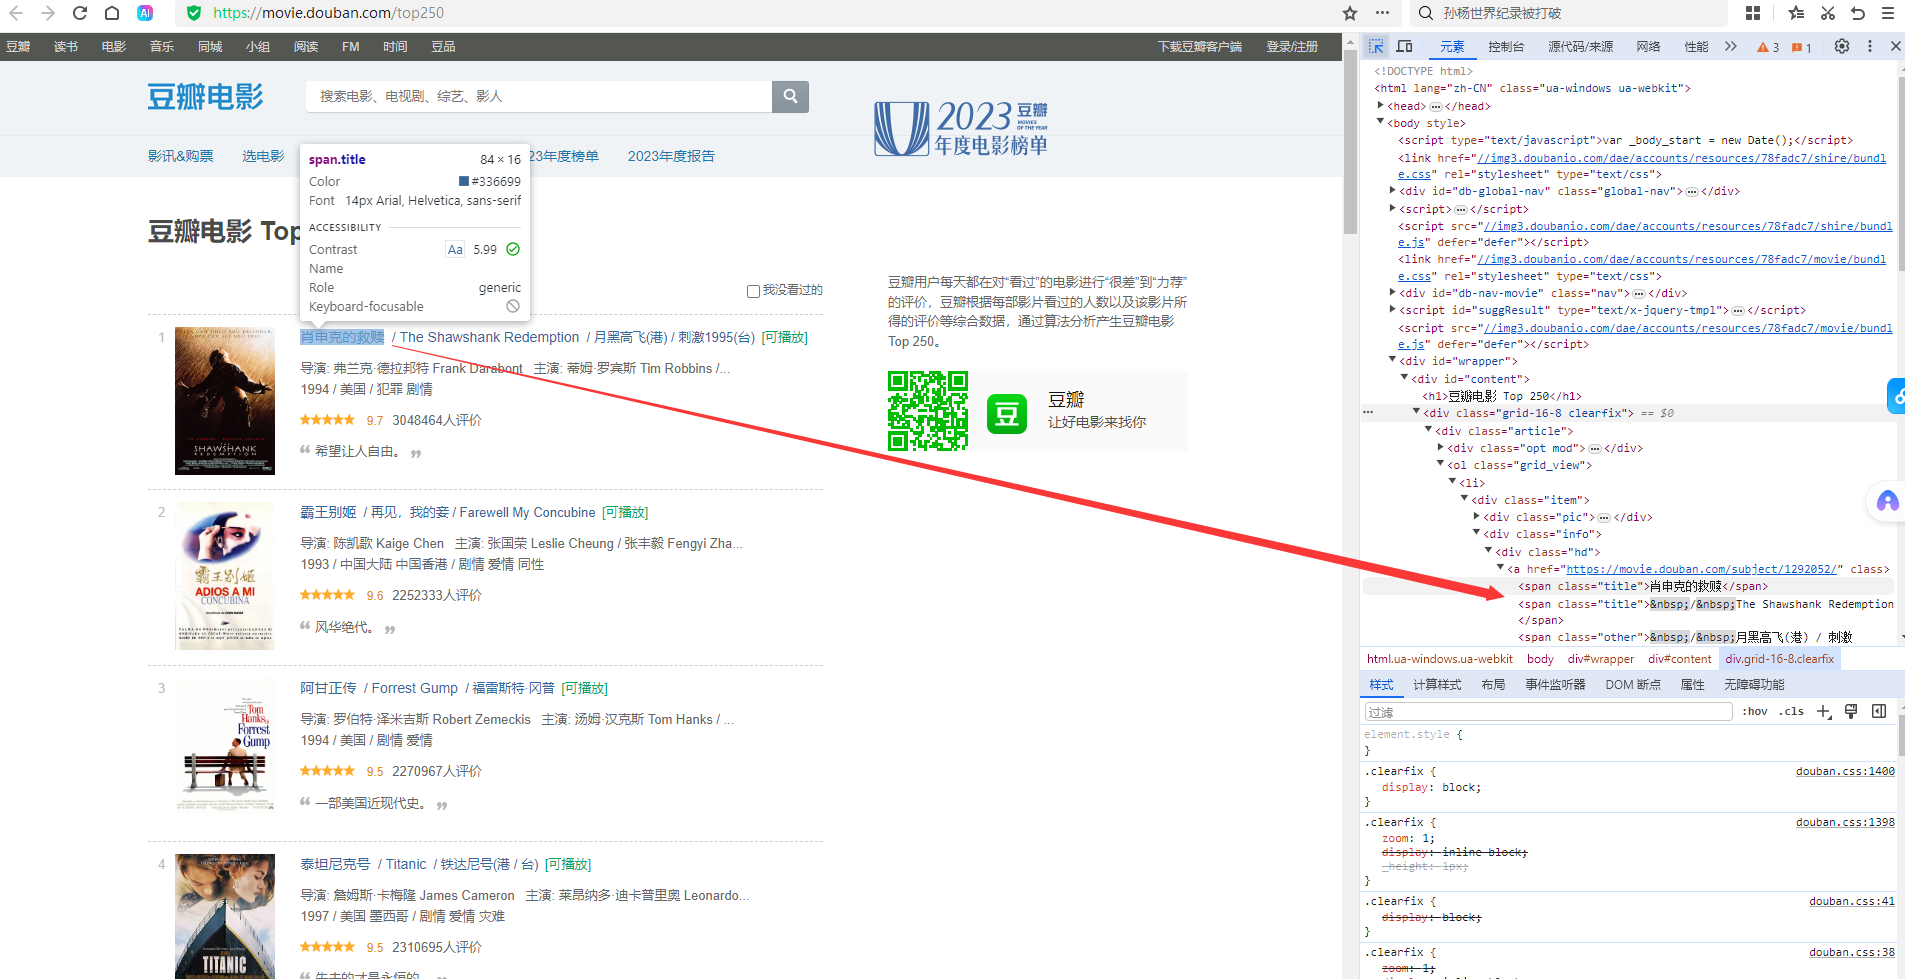

会发现所有`span`元素的`class`属性的值都是title，则将标题提取出来并赋值给新变量`all_titles`

In [12]:
all_titles = soup.findAll("span", attrs={"class":"title"})

因为`all_titles`是可迭代的对象，所以遍历循环每个对象的标题并赋值给新变量`titles_string`

In [15]:
for titles in all_titles:
    titles_string = titles
    print(titles_string.string)

肖申克的救赎
 / The Shawshank Redemption
霸王别姬
阿甘正传
 / Forrest Gump
泰坦尼克号
 / Titanic
千与千寻
 / 千と千尋の神隠し
这个杀手不太冷
 / Léon
美丽人生
 / La vita è bella
星际穿越
 / Interstellar
盗梦空间
 / Inception
楚门的世界
 / The Truman Show
辛德勒的名单
 / Schindler's List
忠犬八公的故事
 / Hachi: A Dog's Tale
海上钢琴师
 / La leggenda del pianista sull'oceano
三傻大闹宝莱坞
 / 3 Idiots
放牛班的春天
 / Les choristes
机器人总动员
 / WALL·E
疯狂动物城
 / Zootopia
无间道
 / 無間道
控方证人
 / Witness for the Prosecution
大话西游之大圣娶亲
 / 西遊記大結局之仙履奇緣
熔炉
 / 도가니
教父
 / The Godfather
触不可及
 / Intouchables
当幸福来敲门
 / The Pursuit of Happyness
寻梦环游记
 / Coco


发现这里的每个标题既包含中文标题又包含外文标题，而外文标题不方便我们理解，所以要筛选并排除出外文标题

In [16]:
for titles in all_titles:
    titles_string = titles.string
    if "/" not in titles_string:
        print(titles_string)

肖申克的救赎
霸王别姬
阿甘正传
泰坦尼克号
千与千寻
这个杀手不太冷
美丽人生
星际穿越
盗梦空间
楚门的世界
辛德勒的名单
忠犬八公的故事
海上钢琴师
三傻大闹宝莱坞
放牛班的春天
机器人总动员
疯狂动物城
无间道
控方证人
大话西游之大圣娶亲
熔炉
教父
触不可及
当幸福来敲门
寻梦环游记


发现这里的标题只有25个，而我们需要前250个，所以根据页面的特点进行循环操作

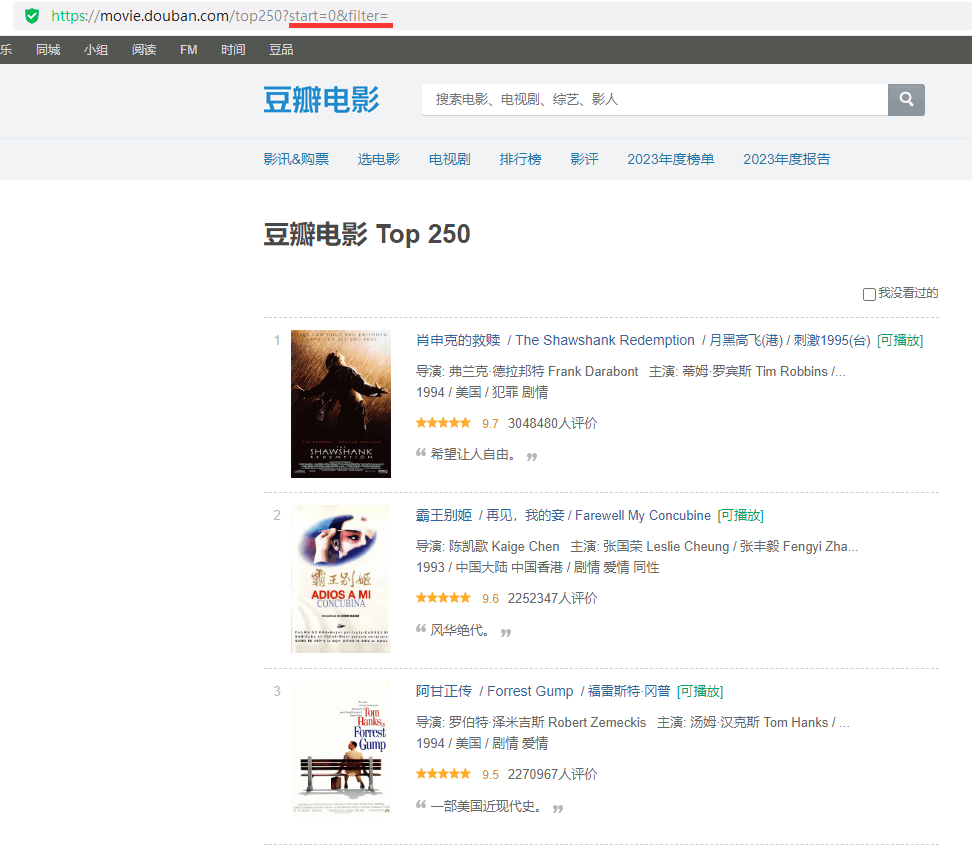

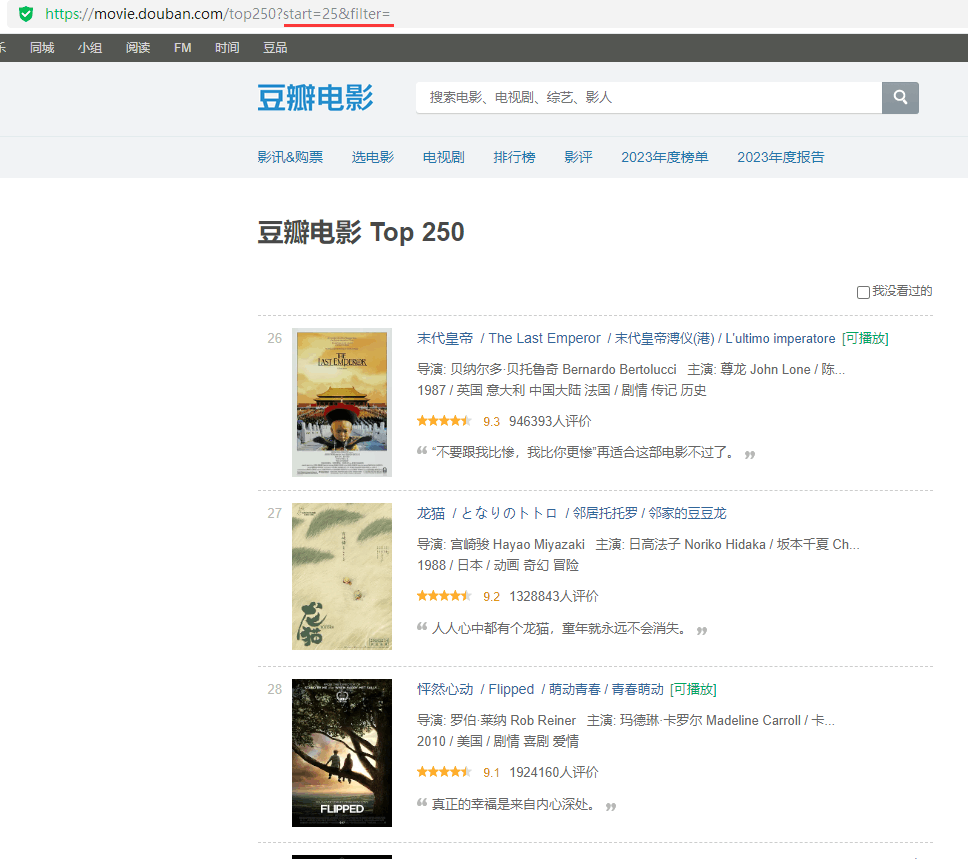

发现每一页都是有25个电影且网页地址有规律可言，则可以根据其页面特点进行循环操作


In [21]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.95 Safari/537.36"
}
##之前写的代码不变，只是将豆瓣网址格式化字符串成start_num
for start_num in range(0,250,25):
    response = requests.get(f"https://movie.douban.com/top250?start={start_num}&filter=", headers=headers)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    all_titles = soup.findAll("span", attrs={"class":"title"})
    for titles in all_titles:
        titles_string = titles.string
        if "/" not in titles_string:
            print(titles_string)

肖申克的救赎
霸王别姬
阿甘正传
泰坦尼克号
千与千寻
这个杀手不太冷
美丽人生
星际穿越
盗梦空间
楚门的世界
辛德勒的名单
忠犬八公的故事
海上钢琴师
三傻大闹宝莱坞
放牛班的春天
机器人总动员
疯狂动物城
无间道
控方证人
大话西游之大圣娶亲
熔炉
教父
触不可及
当幸福来敲门
寻梦环游记
末代皇帝
龙猫
怦然心动
哈利·波特与魔法石
活着
蝙蝠侠：黑暗骑士
指环王3：王者无敌
我不是药神
乱世佳人
飞屋环游记
素媛
哈尔的移动城堡
十二怒汉
让子弹飞
何以为家
海蒂和爷爷
猫鼠游戏
摔跤吧！爸爸
天空之城
鬼子来了
少年派的奇幻漂流
钢琴家
指环王2：双塔奇兵
大话西游之月光宝盒
闻香识女人
死亡诗社
绿皮书
大闹天宫
罗马假日
黑客帝国
指环王1：护戒使者
天堂电影院
教父2
狮子王
辩护人
饮食男女
搏击俱乐部
本杰明·巴顿奇事
美丽心灵
穿条纹睡衣的男孩
窃听风暴
情书
两杆大烟枪
音乐之声
西西里的美丽传说
看不见的客人
哈利·波特与死亡圣器(下)
阿凡达
拯救大兵瑞恩
小鞋子
功夫
飞越疯人院
沉默的羔羊
布达佩斯大饭店
哈利·波特与阿兹卡班的囚徒
蝴蝶效应
禁闭岛
致命魔术
心灵捕手
超脱
低俗小说
摩登时代
春光乍泄
喜剧之王
海豚湾
致命ID
美国往事
杀人回忆
哈利·波特与密室
红辣椒
加勒比海盗
一一
七宗罪
狩猎
唐伯虎点秋香
7号房的礼物
被嫌弃的松子的一生
蝙蝠侠：黑暗骑士崛起
甜蜜蜜
爱在黎明破晓前
第六感
超能陆战队
请以你的名字呼唤我
重庆森林
入殓师
断背山
剪刀手爱德华
幽灵公主
寄生虫
爱在日落黄昏时
勇敢的心
菊次郎的夏天
借东西的小人阿莉埃蒂
未麻的部屋
消失的爱人
无人知晓
时空恋旅人
完美的世界
阳光灿烂的日子
倩女幽魂
哈利·波特与火焰杯
天使爱美丽
小森林 夏秋篇
侧耳倾听
茶馆
驯龙高手
教父3
怪兽电力公司
幸福终点站
新世界
一个叫欧维的男人决定去死
玩具总动员3
傲慢与偏见
小森林 冬春篇
头脑特工队
被解救的姜戈
萤火之森
釜山行
色，戒
神偷奶爸
九品芝麻官
哪吒闹海
告白
玛丽和马克思
喜宴
大鱼
模仿游戏
头号玩家
花样年华
射雕英雄传之东成西就
七武士
我是山姆
惊魂记
血战钢锯岭
阳光姐妹淘
恐怖直播
你的名字。
黑客帝国3：矩阵革命
三块广告牌
电锯惊魂
心迷宫
达拉斯买家俱乐部
疯狂原

## 好了到此结束，祝您变得更强